## Gradient Boosting - Hauptnutzfläche
Random Forest Model zur Schätzung der Hauptnutzfläche

### Datensatz
Imports & Datensatz laden

In [1]:
from sklearn.ensemble import GradientBoostingRegressor

import package.charts as charts
import package.importer as im
import package.ml_helper as ml_helper

# load dataset
df = im.get_dataset('package/dataset.csv')
X, y = ml_helper.hnf_dataset(df)
# X, y = ml_helper.hnf_dataset(df, upper_percentile='75%')
# X, y = ml_helper.hnf_dataset(df, upper_percentile='50%')
# X, y = ml_helper.hnf_dataset(df, upper_percentile='25%')

### Modell trainieren
Trainieren und testen des Models mit Repeated-Cross-Validation

In [2]:
regr = GradientBoostingRegressor(random_state=0)
scores = ml_helper.cross_validation(regr, X, y)


### Evaluieren
Auswertung des trainierten Models

In [3]:
ml_helper.evaluate_cv_scores(scores)

Evaluation
-------------------------
Fit time: 0.026789
Score time: 0.002329

[test_r2]
mean=0.867947 std=0.066920

[test_neg_mean_absolute_percentage_error]
mean=-0.217413 std=0.033392

[test_neg_root_mean_squared_error]
mean=-1485.152846 std=411.525516

[test_neg_mean_absolute_error]
mean=-618.933044 std=118.194522

[test_max_error]
mean=-9976.687329 std=3344.763969




### Features Importance
Wichtigkeit der Features für das Modell

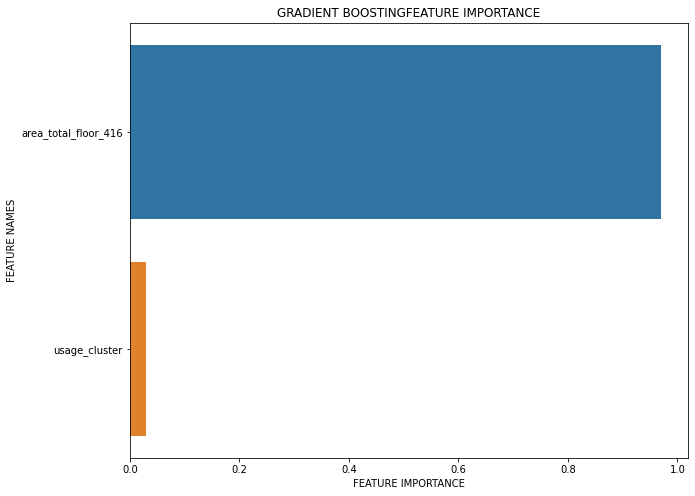

In [4]:
model = regr.fit(X, y)
charts.plot_feature_importance(model.feature_importances_, X.columns, 'GRADIENT BOOSTING')

### Decision Tree
Visualisieren des Desicion Tree

In [5]:
# TODO: Visualize decision tree

### Modell speichern
Serialisieren des Modells für API

In [6]:
model = regr.fit(X, y)
ml_helper.serialize_model(model, 'gradient_boosting_model')

Location: D:\Development\FHNW\ip5-metriken-bauwesen\export\gradient_boosting_model.joblib
